# 1. Enclosing Circle [10 pts]

#### by Roumen Guha on Sunday, March 5th, 2017

Given a set of points in the plane $x_i \in \mathbb{R}^2$, we would like to find the circle with smallest possible area that contains all of the points. Explain how to model this as an optimization problem. To test your model, generate a set of 50 random points using the code $X = 4+randn(2,50)$ (this generates a $2 \times 50$ matrix $X$ whose columns are the $x_i$). Produce a plot of the randomly generated points along with the enclosing circle of smallest area.

The benefit of using a regular circle is that we only need to worry about the value of the radius. We can set the value of the radius to be *at least* the largest distance away from the center (4,4). This distance can be found using the norm function.

https://en.wikipedia.org/wiki/Smallest-circle_problem

In [156]:
X = 4 + randn(2, 50)            # generate 50 random points
x1 = 4; x2 = 4                  # radius and coordinates of the center
t = linspace(0, 2pi, 100)

using JuMP, Mosek, Gurobi

m = Model()

@variable(m, Radius >= 0)

center = zeros(2,50)
for i in 1:50
    center[:, i] = [x1, x2]
    @constraint(m, norm(X[:, i] - 4) <= Radius)
end

@objective(m, Min, Radius)

status = solve(m)

:Optimal

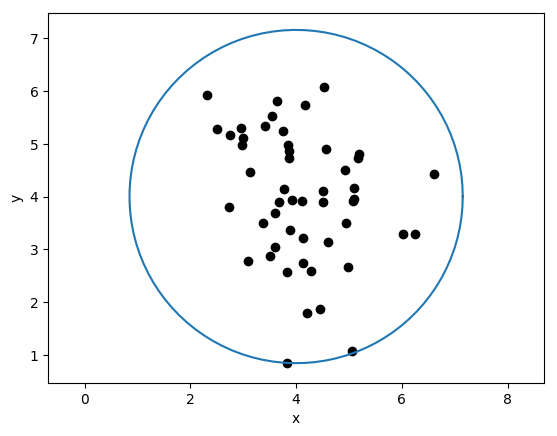

In [160]:
using PyPlot
r = (getvalue(Radius))                 # radius
plot(x1 + r*cos(t), x2 + r*sin(t))     # plot circle radius r with center (x1,x2)
scatter(X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal")                          # make x and y scales equal
xlabel("x")
ylabel("y")
;

In [161]:
print(m)

Min Radius
Subject to
 -Radius <= -1.105668845440051
 -Radius <= -1.8427112101651921
 -Radius <= -1.4322902385360814
 -Radius <= -1.4562497588725636
 -Radius <= -1.659404151147128
 -Radius <= -1.3708063118797977
 -Radius <= -1.9709827125396553
 -Radius <= -0.13317095127911202
 -Radius <= -1.0970151831214479
 -Radius <= -0.27388557664402774
 -Radius <= -2.1839698305313755
 -Radius <= -1.5184334111544462
 -Radius <= -0.8782217248799491
 -Radius <= -2.2113069862578953
 -Radius <= -1.0502727821964166
 -Radius <= -0.7946025294738287
 -Radius <= -0.5073577927681419
 -Radius <= -1.0316723914481212
 -Radius <= -0.7482928133299107
 -Radius <= -0.5147293059339388
 -Radius <= -0.7995343355725907
 -Radius <= -0.9857372868413039
 -Radius <= -1.0612766318355564
 -Radius <= -0.9883939690576633
 -Radius <= -1.4418956714394289
 -Radius <= -1.2863627977867338
 -Radius <= -1.4167045806265146
 -Radius <= -1.067416295400232
 -Radius <= -1.2623568076616967
 -Radius <= -1.7472720642007655
 -Radius <= -0.6529